# CodSoft ML Internship

#### Name:Shreejit Gautam

### Batch-May Batch A53

## Task 1:Movie Genre Classification

### Importing all data 

In [1]:
import numpy as np
import pandas as pd
train_path = "Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
test_path ="Genre Classification Dataset/test_data.txt"
test_data=pd.read_csv(test_path, sep=':::', names=['Id','Title','Description'], engine='python')
test_data_solution=pd.read_csv("Genre Classification Dataset/test_data_solution.txt", sep=':::', names=['Id','Title','Genre','Description'], engine='python')


### Taking Overview of all dataset

In [2]:
print("Training data:")
print(train_data)
print(train_data.describe())
#checking for null data
train_data.isnull().sum()


Training data:
                                              Title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  
1       Listening in to a conversation between his do...  
2       A brother and sist

Title          0
Genre          0
Description    0
dtype: int64

In [3]:
print("Testing data and solution")
print(test_data)
print(test_data_solution)
print(test_data.describe())
#checking for null data
test_data.isnull().sum()

Testing data and solution
          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and his family ...  
3       His father has died, he hasn't spoken with hi...  
4       Before he was known internationally as a mart...  
...                

Id             0
Title          0
Description    0
dtype: int64

### Visualizing the data

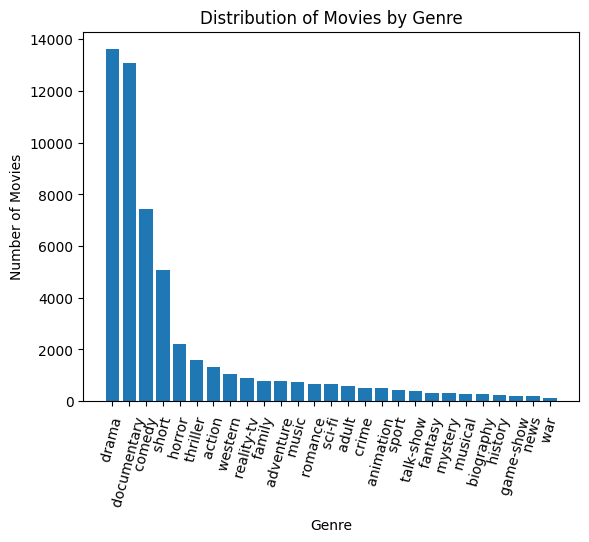

<Figure size 2500x10000 with 0 Axes>

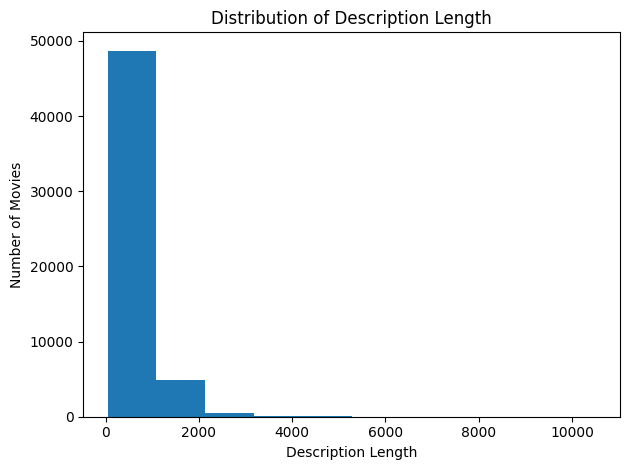

In [4]:
import matplotlib.pyplot as plt

# Assuming Genre is a categorical column
genre_counts = train_data['Genre'].value_counts()

# Visualize number of movies per genre (Bar Chart)
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movies by Genre")
plt.xticks(rotation=75)  # Rotate x-axis labels for readability
plt.figure(figsize=(25, 100))
plt.show()

# Analyze Description Length distribution (Histogram)
# Might reveal differences in description styles between genres
plt.hist(train_data["Description"].str.len())
plt.xlabel("Description Length")
plt.ylabel("Number of Movies")
plt.title("Distribution of Description Length")
plt.tight_layout()
plt.show()

### Preprocessing the training data

In [5]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')


def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    return text

def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

def lemmatize_text(tokens):
    # Lemmatize tokens
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    return lemmatized_tokens

def preprocess_description(description):
    cleaned_text = clean_text(description)
    tokens = tokenize_text(cleaned_text)
    tokens_no_stopwords = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize_text(tokens_no_stopwords)
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the dataset
train_data['Processed_Description'] = train_data['Description'].apply(preprocess_description)

# View the processed data
print(train_data[['Description', 'Processed_Description']])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Description  \
1       Listening in to a conversation between his do...   
2       A brother and sister with a past incestuous r...   
3       As the bus empties the students for their fie...   
4       To help their unemployed father make ends mee...   
5       The film's title refers not only to the un-re...   
...                                                  ...   
54210   This short-lived NBC live sitcom centered on ...   
54211   The NEXT Generation of EXPLOITATION. The sist...   
54212   Ze bestaan echt, is a stand-up comedy about g...   
54213   Walter and Vivian live in the country and hav...   
54214   On Labor Day Weekend, 1935, the most intense ...   

                                   Processed_Description  
1      listen conversation doctor parent yearold osca...  
2      brother sister past incestuous relationship cu...  
3      bus empty student field trip museum natural hi...  
4      help unemployed father make end meet

### Traning The Model

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Processed_Description'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Description'])
y_test = test_data_solution['Genre']

In [30]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, train_data['Genre'], test_size=0.2, random_state=42)
sv_classifier = LinearSVC()
sv_classifier.fit(X_train, y_train)
y_pred = sv_classifier.predict(X_val)


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [31]:
print("On Validation set")
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_val, y_pred))

On Validation set
Accuracy: 0.5786221525408097
Classification Report:
               precision    recall  f1-score   support

      action        0.48      0.34      0.40       263
       adult        0.74      0.45      0.56       112
   adventure        0.36      0.18      0.24       139
   animation        0.37      0.13      0.20       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.55      1443
       crime        0.27      0.07      0.11       107
 documentary        0.68      0.81      0.74      2659
       drama        0.56      0.72      0.63      2697
      family        0.41      0.17      0.24       150
     fantasy        0.43      0.08      0.14        74
   game-show        0.88      0.53      0.66        40
     history        0.33      0.02      0.04        45
      horror        0.62      0.65      0.63       431
       music        0.59      0.53      0.56       144
     musical        0.40      0.08      0.13     

In [32]:
y_test_predictions = sv_classifier.predict(X_test)
print("On Test set")
accuracy = accuracy_score(y_test, y_test_predictions)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_test_predictions))

On Test set
Accuracy: 0.4481365313653137
Classification Report:
               precision    recall  f1-score   support

      action        0.51      0.09      0.15      1314
       adult        0.70      0.18      0.28       590
   adventure        0.77      0.05      0.09       775
   animation        0.39      0.03      0.06       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.37      0.44      7446
       crime        0.36      0.01      0.02       505
 documentary        0.72      0.43      0.54     13096
       drama        0.40      0.85      0.54     13612
      family        0.62      0.05      0.09       783
     fantasy        0.33      0.01      0.01       322
   game-show        0.98      0.25      0.40       193
     history        0.00      0.00      0.00       243
      horror        0.68      0.34      0.45      2204
       music        0.51      0.50      0.51       731
     musical        0.24      0.02      0.03       276


### Taking sample test

In [34]:
description="His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are against him and when stakes are the highest, Diego gets a visit from a very uncommon man."
t_v1 = tfidf_vectorizer.transform([description])
pred_label = sv_classifier.predict(t_v1)
print(np.array2string((pred_label)))

[' drama ']


### Thank you